# **Jokes Recommendation System**

## **Imports**

In [174]:
import pandas as pd
import numpy as np

## **Dataset**

### **Extraction**

In [175]:
!mkdir zip_jester_dataset

!wget -P zip_jester_dataset/ \
https://eigentaste.berkeley.edu/dataset/jester_dataset_1_joke_texts.zip \
https://eigentaste.berkeley.edu/dataset/jester_dataset_1_1.zip \
https://eigentaste.berkeley.edu/dataset/jester_dataset_1_2.zip \
https://eigentaste.berkeley.edu/dataset/jester_dataset_1_3.zip
!echo "Downloaded files into directory"

!mkdir unzipped_files

!unzip 'zip_jester_dataset/*.zip' -d unzipped_files/

# # Sameer
# from zipfile import ZipFile
# with ZipFile('zip_jester_dataset/jester_dataset_1_joke_texts.zip', 'r') as zipObj:
#    zipObj.extractall('unzipped_files')
# with ZipFile('zip_jester_dataset/jester_dataset_1_1.zip', 'r') as zipObj:
#     zipObj.extractall('unzipped_files')
# with ZipFile('zip_jester_dataset/jester_dataset_1_2.zip', 'r') as zipObj:
#     zipObj.extractall('unzipped_files')
# with ZipFile('zip_jester_dataset/jester_dataset_1_3.zip', 'r') as zipObj:
#     zipObj.extractall('unzipped_files')

!echo "Unzipped all dataset files into unzipped_files directory"

A subdirectory or file zip_jester_dataset already exists.
'wget' is not recognized as an internal or external command,
operable program or batch file.


"Downloaded files into directory"


A subdirectory or file unzipped_files already exists.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


"Unzipped all dataset files into unzipped_files directory"


### **Exploration**

In [176]:
import pandas as pd
all_100_jokes_html = {}  # key: joke_id, value: joke_html
for i in range(1, 101):
    with open(f'unzipped_files/jokes/init{str(i)}.html') as f:
        all_100_jokes_html[i] = f.read()

print(all_100_jokes_html)
print(len(all_100_jokes_html))

{1: '<HTML>\n<HEAD>\n<TITLE>Joke 1 of 25</TITLE>\n</HEAD>\n\n<BODY TEXT="black" BGCOLOR="#fddf84">\n\n<center>\n<TABLE WIDTH="620" CELLSPACING="0" CELLPADDING="0">\n<TD WIDTH="470">\n<Font Size="+1"> <BR> \n<!--begin of joke -->\nA man visits the doctor. The doctor says "I have bad news for you.You have\ncancer and Alzheimer\'s disease". <P>\nThe man replies "Well,thank God I don\'t have cancer!"\n<!--end of joke -->\n</TD></TABLE>\n</center>\n</BODY>\n</HTML>\n\n', 2: '<HTML>\n<HEAD>\n    <TITLE>Joke 2 of 25</TITLE>\n</HEAD>\n\n<BODY TEXT="black" BGCOLOR="#fddf84">\n\n<TABLE WIDTH="620" CELLSPACING="0" CELLPADDING="0">\n\n<TD Width="130"> </TD>\n<TD WIDTH="470">\n<BR><CENTER><FONT color="red" size="+2">\n</Font></center>\n<UL> <Font Size="+1"> <BR>\n<!--begin of joke -->\nThis couple had an excellent relationship going until one day he came home\nfrom work to find his girlfriend packing. He asked her why she was leaving him\nand she told him that she had heard awful things about him. 

### **Sameer**

#### **Preprocessing**

In [177]:
import re
jokes = {}
for joke in all_100_jokes_html:
    unfiltered_joke = re.search('<!--begin of joke -->(.*)<!--end of joke -->', all_100_jokes_html[joke], re.DOTALL).group(1)
    filtered_joke = re.sub('<.*?>', '', unfiltered_joke).replace('\n', '')
    jokes[joke] = filtered_joke

print(jokes)
print(len(jokes))

{1: 'A man visits the doctor. The doctor says "I have bad news for you.You havecancer and Alzheimer\'s disease". The man replies "Well,thank God I don\'t have cancer!"', 2: 'This couple had an excellent relationship going until one day he came homefrom work to find his girlfriend packing. He asked her why she was leaving himand she told him that she had heard awful things about him. "What could they possibly have said to make you move out?" "They told me that you were a pedophile." He replied, "That\'s an awfully big word for a ten year old." ', 3: "Q. What's 200 feet long and has 4 teeth? A. The front row at a Willie Nelson Concert.", 4: "Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.", 5: "Q.\tWhat's O. J. Simpson's Internet address? A.\tSlash, slash, backslash, slash, slash, escape.", 6: "Bill & Hillary are on a trip back to Arkansas. They're almost out of gas, so Bill pulls into a service station on the outskirts oftown.

In [178]:
rating_set_1 = pd.read_excel('unzipped_files/jester-data-1.xls', header=None)
print(rating_set_1.shape)
print(rating_set_1.head())
rating_set_2 = pd.read_excel('unzipped_files/jester-data-2.xls', header=None)
rating_set_3 = pd.read_excel('unzipped_files/jester-data-3.xls', header=None)

(24983, 101)
0         74
1        100
2         49
3         48
4         91
        ... 
24978    100
24979     91
24980     39
24981     37
24982     72
Name: 0, Length: 24983, dtype: int64


In [179]:
rating_jokes = {}
for i in range(1, 101):
    rating_jokes[i] = {}
    rating_jokes_i = []
    for j in range(len(rating_set_1[i])):
        if rating_set_1[i][j] != 99:
            rating_jokes_i.append(rating_set_1[i][j])
        
    for j in range(len(rating_set_2[i])):
        if rating_set_2[i][j] != 99:
            rating_jokes_i.append(rating_set_2[i][j])

    for j in range(len(rating_set_3[i])):
        if rating_set_3[i][j] != 99:
            rating_jokes_i.append(rating_set_3[i][j])

    rating_jokes[i] = rating_jokes_i

print("Clean ratings from all sets for joke 1 by all people:",  len(rating_jokes[1])) # ratings from all sets for joke 1 by all people
print("Clean ratings from all set by all people:", len(rating_jokes)) # should be 100 jokes
    

Clean ratings from all sets for joke 1 by all people: 32024
Clean ratings from all set by all people: 100


In [180]:
ratings = []
for joke in rating_jokes:
    ratings.append(rating_jokes[joke])

ratings_df = pd.DataFrame(ratings).T

number_of_rated_jokes = []
for i in range(0, 100):
    number_of_rated_jokes.append(ratings_df[i].count())
ratings_df.insert(0, "user_id", ratings_df.index + 1)
ratings_df.columns = ["user_id"] + ["joke_" + str(i) + " (" + str(number_of_rated_jokes[i-1]) + ")" for i in range(1, 101)]

print(ratings_df.shape)
print(ratings_df.head())

# export to csv
# ratings_df.to_csv('jester_ratings_preprocessed.csv', index=False)

(73413, 101)
   user_id  joke_1 (32024)  joke_2 (35277)  joke_3 (32402)  joke_4 (30512)  \
0        1           -7.82            8.79           -9.66           -8.16   
1        2            4.08           -0.29            6.36            4.37   
2        3            8.50            8.35           -4.17           -5.39   
3        4           -6.17            4.61            0.44           -8.50   
4        5            6.84           -3.54            9.17           -6.21   

   joke_5 (73405)  joke_6 (39599)  joke_7 (73401)  joke_8 (73411)  \
0           -7.52           -8.50           -9.85            4.17   
1           -2.38           -9.66           -0.73           -5.34   
2            9.03            9.27            9.03            9.27   
3            1.80            8.16           -2.82            6.21   
4            1.36            1.60            7.04            4.61   

   joke_9 (30741)  ...  joke_91 (20934)  joke_92 (21214)  joke_93 (21506)  \
0           -8.98  ...    

#### **EDA**

In [181]:
print("Total jokes that weren't rated by someone:", ratings_df.isnull().sum().sum())
print("Columns:", ratings_df.columns)
print(ratings_df.describe())

Total jokes that weren't rated by someone: 3204940
Columns: Index(['user_id', 'joke_1 (32024)', 'joke_2 (35277)', 'joke_3 (32402)',
       'joke_4 (30512)', 'joke_5 (73405)', 'joke_6 (39599)', 'joke_7 (73401)',
       'joke_8 (73411)', 'joke_9 (30741)',
       ...
       'joke_91 (20934)', 'joke_92 (21214)', 'joke_93 (21506)',
       'joke_94 (21792)', 'joke_95 (21991)', 'joke_96 (22163)',
       'joke_97 (22556)', 'joke_98 (22708)', 'joke_99 (23188)',
       'joke_100 (19494)'],
      dtype='object', length=101)
            user_id  joke_1 (32024)  joke_2 (35277)  joke_3 (32402)  \
count  73413.000000    32024.000000    35277.000000    32402.000000   
mean   36707.000000        0.901997        0.162989        0.193411   
std    21192.651993        5.242998        5.627972        5.448998   
min        1.000000       -9.950000       -9.950000       -9.950000   
25%    18354.000000       -2.820000       -4.510000       -4.220000   
50%    36707.000000        1.600000        0.730000    

In [184]:
from sklearn import preprocessing
ratings_df_normalized = ratings_df.copy()
ratings_df_normalized = ratings_df_normalized.drop(columns=['user_id'])
ratings_df_normalized = ratings_df_normalized.fillna(0)
ratings_df_normalized = preprocessing.normalize(ratings_df_normalized)
ratings_df_normalized = pd.DataFrame(ratings_df_normalized)
ratings_df_normalized.insert(0, "user_id", ratings_df["user_id"])
ratings_df_normalized.columns = ["user_id"] + ["joke_" + str(i) for i in range(1, 101)]

print(ratings_df_normalized.shape)
print(ratings_df_normalized.head())

# export to csv
ratings_df_normalized.to_csv('jester_ratings_normalized.csv', index=False)

(73413, 101)
   user_id    joke_1    joke_2    joke_3    joke_4    joke_5    joke_6  \
0        1 -0.114477  0.128677 -0.141412 -0.119454 -0.110085 -0.124431   
1        2  0.071437 -0.005078  0.111358  0.076515 -0.041672 -0.169138   
2        3  0.123588  0.121407 -0.060631 -0.078369  0.131294  0.134783   
3        4 -0.118022  0.088182  0.008416 -0.162591  0.034431  0.156088   
4        5  0.132125 -0.068381  0.177133 -0.119956  0.026271  0.030907   

     joke_7    joke_8    joke_9  ...   joke_91   joke_92   joke_93   joke_94  \
0 -0.144194  0.061045 -0.131458  ...  0.041282 -0.072463 -0.004245  0.115062   
1 -0.012782 -0.093499  0.155481  ...  0.049376  0.097701  0.074764  0.158983   
2  0.131294  0.134783 -0.006397  ...  0.075461 -0.100179 -0.009887  0.007706   
3 -0.053942  0.118787 -0.127204  ... -0.067714 -0.021424 -0.001913  0.099276   
4  0.135989  0.089049 -0.100253  ...  0.139659 -0.005602  0.080550 -0.057177   

    joke_95   joke_96   joke_97   joke_98   joke_99  joke_100

(7341300, 3)


C:\Users\gupta\AppData\Local\Temp\ipykernel_48820\402725234.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


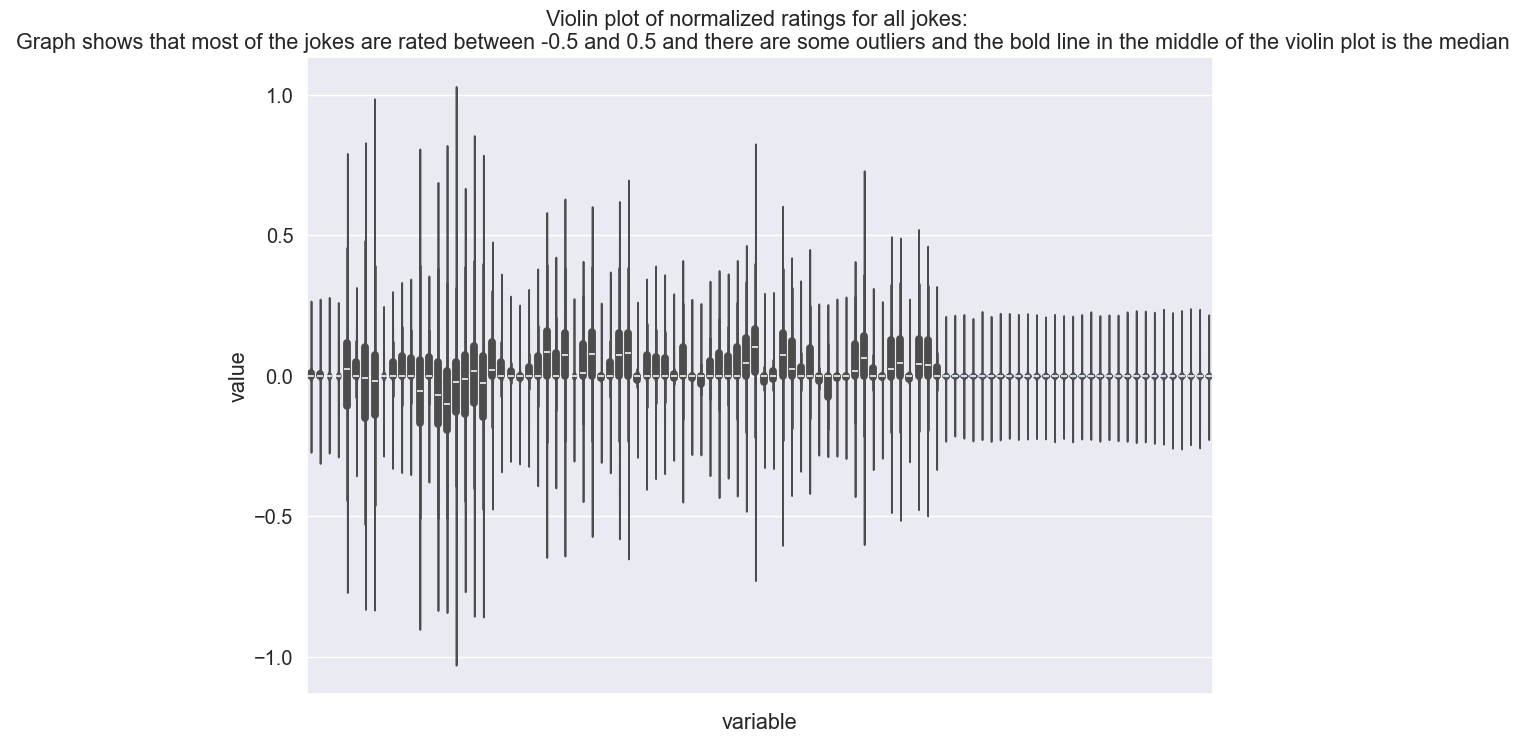

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.3)

ratings_df_normalized_melted = pd.melt(ratings_df_normalized, id_vars=['user_id'], value_vars=['joke_' + str(i) for i in range(1, 101)])
print(ratings_df_normalized_melted.shape)

ax = sns.violinplot(x="variable", y="value", data=ratings_df_normalized_melted)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Violin plot of normalized ratings for all jokes: \n Graph shows that most of the jokes are rated between -0.5 and 0.5 and there are some outliers and the bold line in the middle of the violin plot is the median')
plt.show()


### **Animesh**
